In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1.

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris.target_names[iris_df['species']]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [1]:
corr = iris_df.drop('species', axis=1).corr()
corr

NameError: name 'iris_df' is not defined

In [5]:
for class_name, group in iris_df.groupby('species'):
    print(f"\n\ncorr for class: {class_name}")
    print(group.drop('species', axis=1).corr())



corr for class: setosa
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000  


corr for class: versicolor
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999        

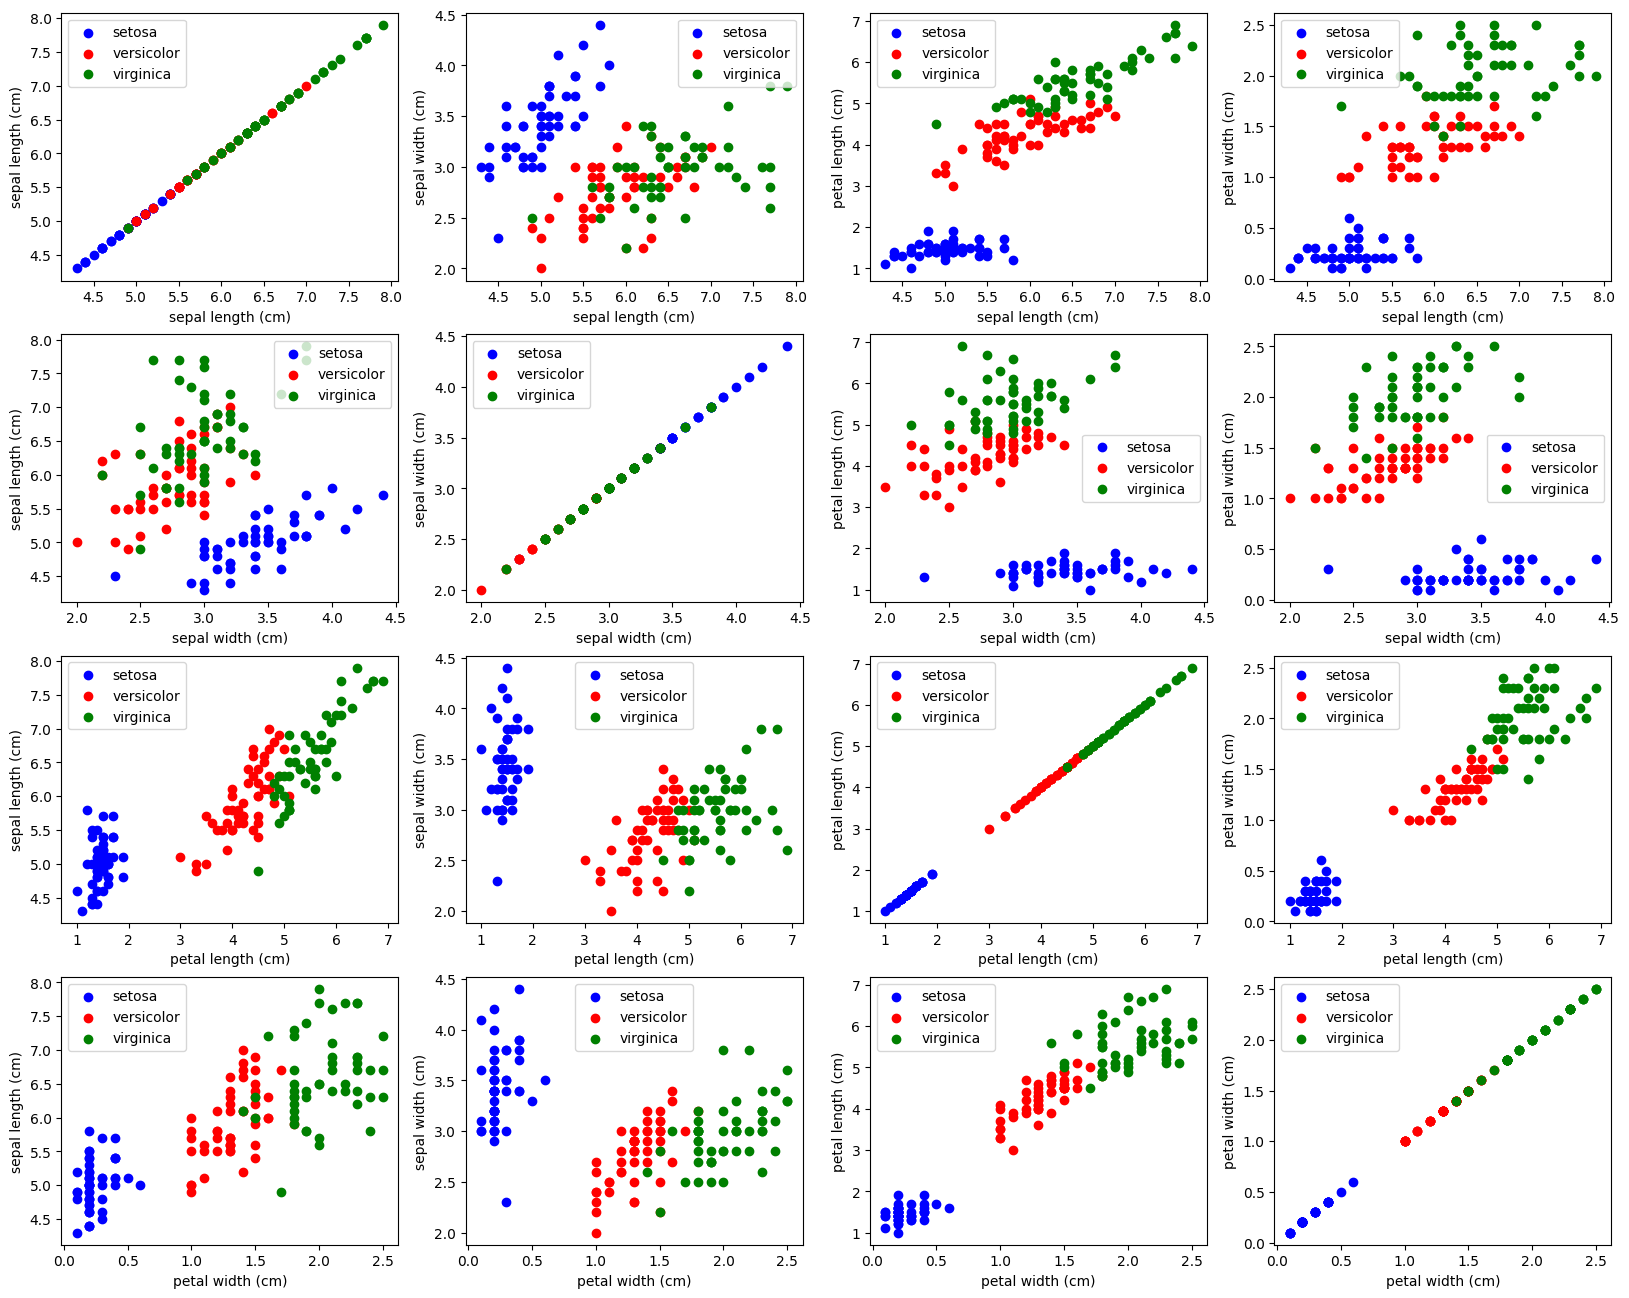

In [6]:
plt.figure(figsize=(20, 16))
for i, feature_name1 in enumerate(iris_df.drop('species', axis=1).columns):
    for j, feature_name2 in enumerate(iris_df.drop('species', axis=1).columns):
        plt.subplot(4, 4, 4 * i + j + 1)
        plt.xlabel(feature_name1)
        plt.ylabel(feature_name2)
        dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
        for label in dict_color:
            plt.scatter(iris_df[iris_df['species'] == label][feature_name1], 
                        iris_df[iris_df['species'] == label][feature_name2], 
                        c=dict_color[label], label=label)
        plt.legend()
plt.show()

# 2.

In [7]:
features = ['sepal width (cm)', 'petal width (cm)']
X = iris_df[features]
y = iris.target

## LinearDiscriminantAnalysis

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda

LinearDiscriminantAnalysis()

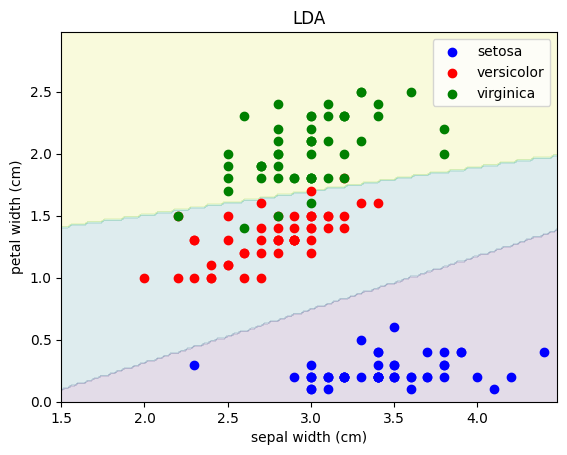

In [9]:
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label) 
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('LDA')
plt.legend()
plt.show()

## QuadraticDiscriminantAnalysis

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
qda

QuadraticDiscriminantAnalysis()

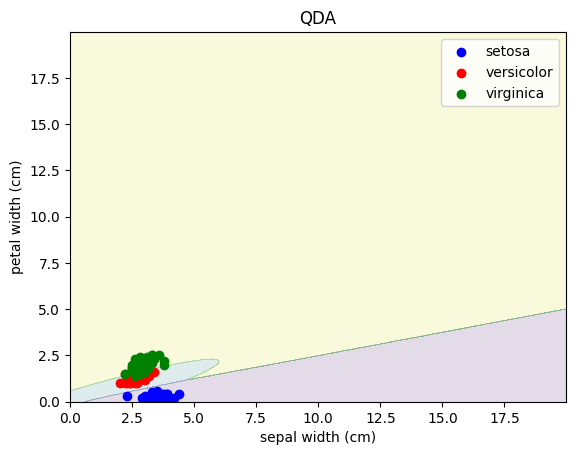

In [29]:
xx, yy = np.meshgrid(np.arange(0, 20, 0.02),
                     np.arange(0, 20, 0.02))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label)
plt.title('QDA')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg

LogisticRegression()

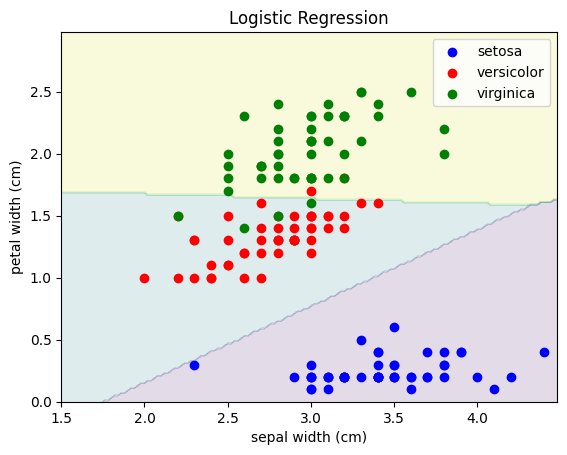

In [13]:
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label)
plt.title('Logistic Regression')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

## SVM, linear kernel

In [14]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X, y)
linear_svc

LinearSVC()

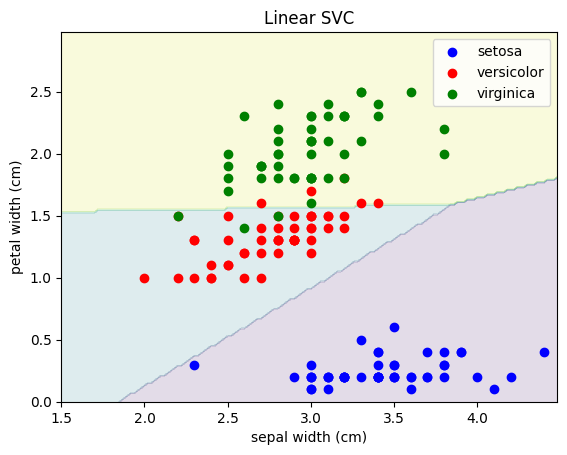

In [15]:
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label)
plt.title('Linear SVC')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

## SVM, quad kernel

In [16]:
from sklearn.svm import SVC
quad_svc = SVC(kernel='poly', degree=2)
quad_svc.fit(X, y)
quad_svc

SVC(degree=2, kernel='poly')

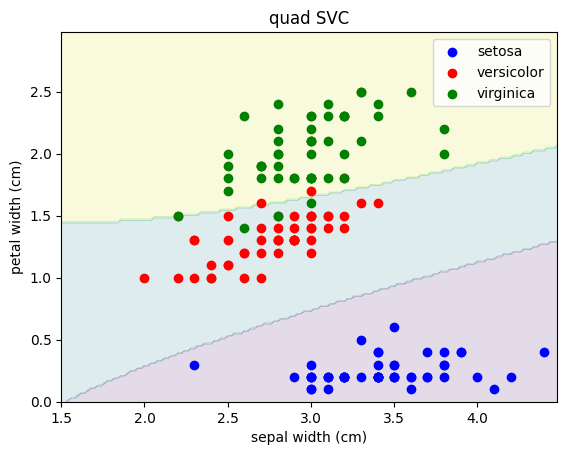

In [17]:
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = quad_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label)
plt.title('quad SVC')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

# 3.

In [18]:
iris_df_no_setosa = iris_df
X = iris_df_no_setosa.drop('species', axis=1)
y = iris.target
X[['sepal length (cm)',	'sepal width (cm)']].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [19]:
X.shape[0]

150

In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda

LinearDiscriminantAnalysis()

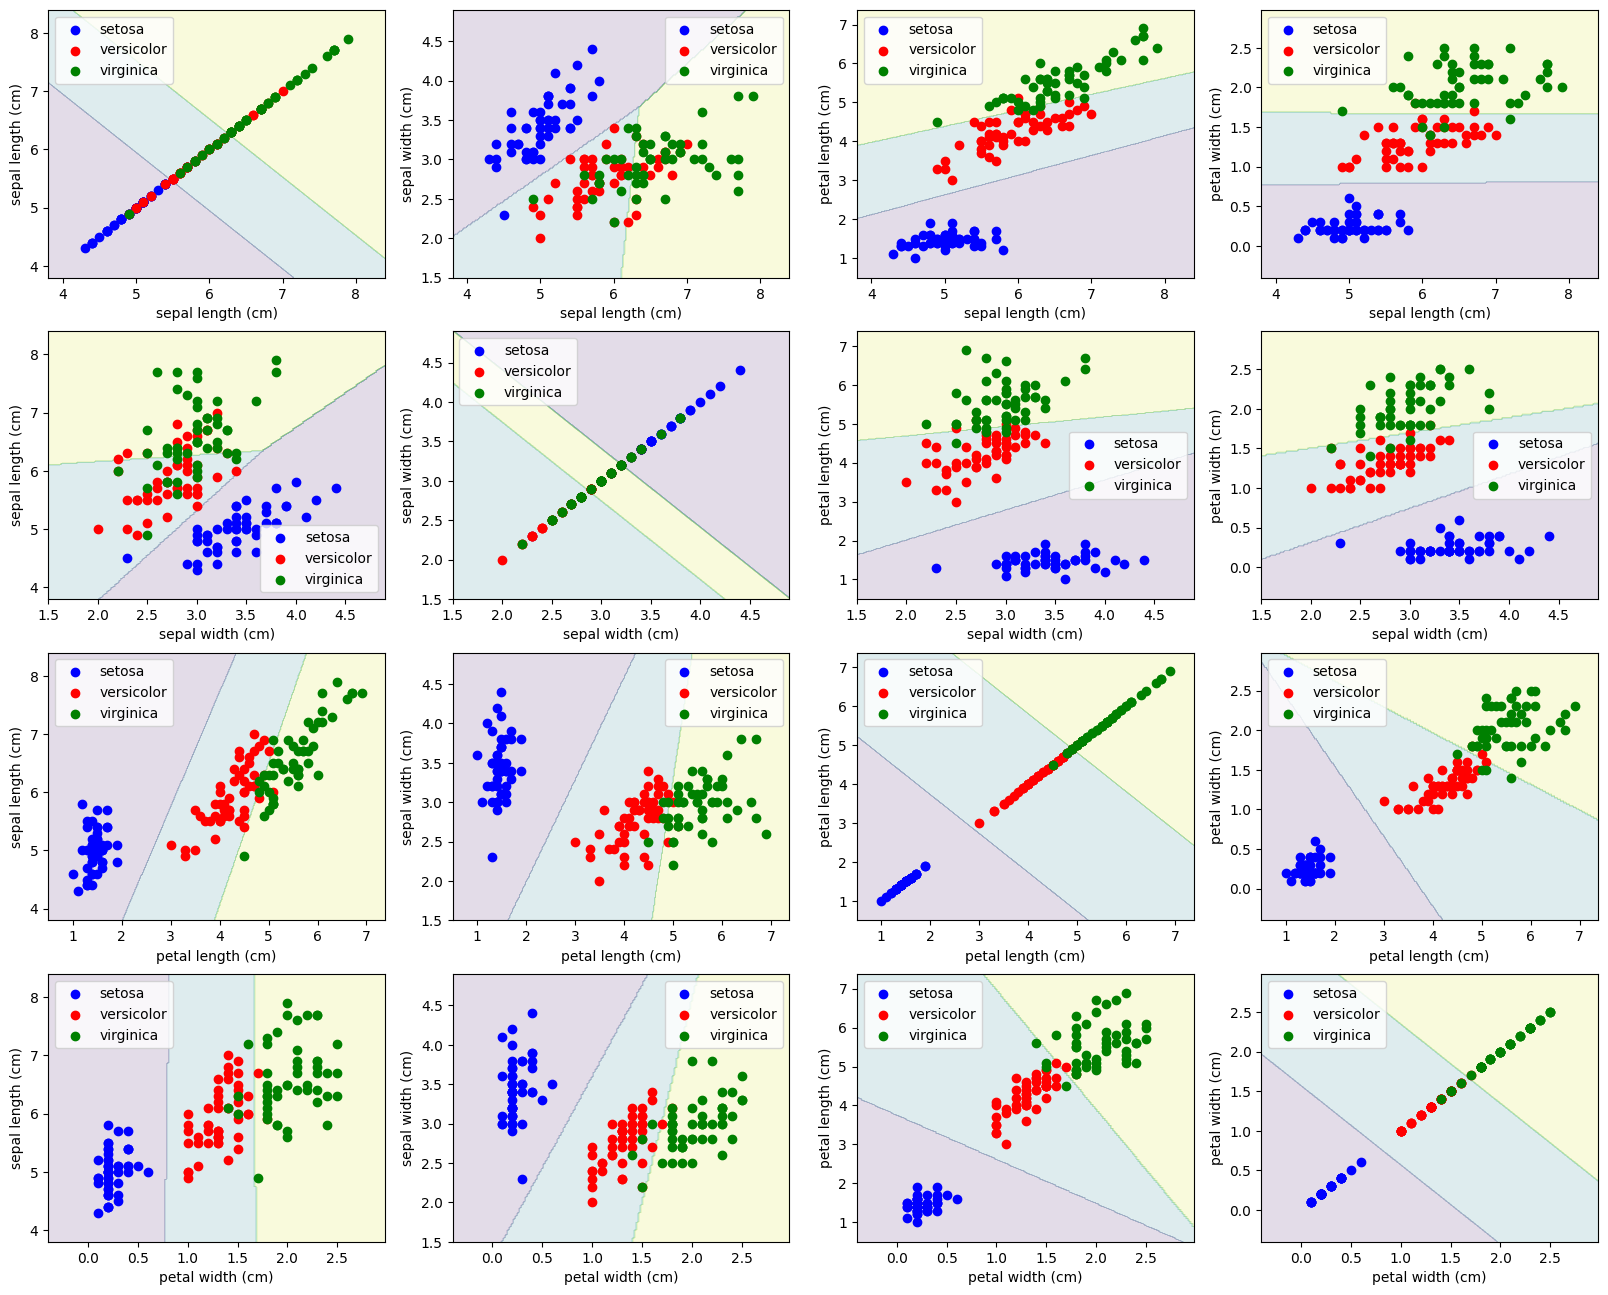

In [21]:
plt.figure(figsize=(20, 16))
for i, feature_name1 in enumerate(iris_df.drop('species', axis=1).columns):
    for j, feature_name2 in enumerate(iris_df.drop('species', axis=1).columns):
        plt.subplot(4, 4, 4 * i + j + 1)
        lda.fit(X[[feature_name1, feature_name2]], y)
        min_x, max_x = X[feature_name1].min() - 0.5, X[feature_name1].max() + 0.5
        min_y, max_y = X[feature_name2].min() - 0.5, X[feature_name2].max() + 0.5
        xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.02),
                            np.arange(min_y, max_y, 0.02))
        Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.15)

        plt.xlabel(feature_name1)
        plt.ylabel(feature_name2)
        dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
        for label in dict_color:
            plt.scatter(iris_df[iris_df['species'] == label][feature_name1], 
                        iris_df[iris_df['species'] == label][feature_name2], 
                        c=dict_color[label], label=label)
        plt.legend()
plt.show()

# 4.

In [22]:
class MyQDA():
    def __init__(self):
        #Векторы средних
        self.means = None
        #ковариационные матрицы
        self.covariances = None
        #Априорные вер-сти классов
        self.priors = None
        #Список классов
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]

        self.means = np.zeros((n_classes, n_features))
        self.covariances = []
        self.priors = np.zeros(n_classes)

        for i, class_name in enumerate(self.classes):
            X_class = X[y == class_name]
            self.means[i] = np.mean(X_class, axis=0) # Средние по признакам класса i
            cov_matrix = np.cov(X_class, rowvar=False) # Ковариационная матрица
            self.covariances.append(cov_matrix)
            self.priors[i] = X_class.shape[0] / X.shape[0] # Отношение кол-ва определенного класса к общему кол-ву объектов

    def __quad_discr(self, x, mean, cov, prior):
        det_cov = np.linalg.det(cov) # Детерминант
        inv_cov = np.linalg.inv(cov) # Обратная ков матрица

        diff = x - mean
        quad_term = np.dot(np.dot(diff.T, inv_cov), diff)

        log_likelihood = -0.5 * (quad_term + np.log(det_cov) + len(x) * np.log(2 * np.pi)) # логарифм правдомодобия
        return log_likelihood + np.log(prior)
    
    def predict(self, X):
        preds = []
        for x in X:
            discrs = [self.__quad_discr(x, self.means[i], self.covariances[i], self.priors[i])
                      for i in range(len(self.classes))] # вычисляем вероятность принадлежности к классам каждого семпла из X
            predicted_class = self.classes[np.argmax(discrs)] # берём индекс с максимальной вероятностью
            preds.append(predicted_class)

        return np.array(preds)

In [23]:
features = ['sepal width (cm)', 'petal width (cm)']
X = iris_df[features]
y = iris.target

In [24]:
my_qda = MyQDA()
my_qda.fit(X, y)
my_qda

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
qda

QuadraticDiscriminantAnalysis()

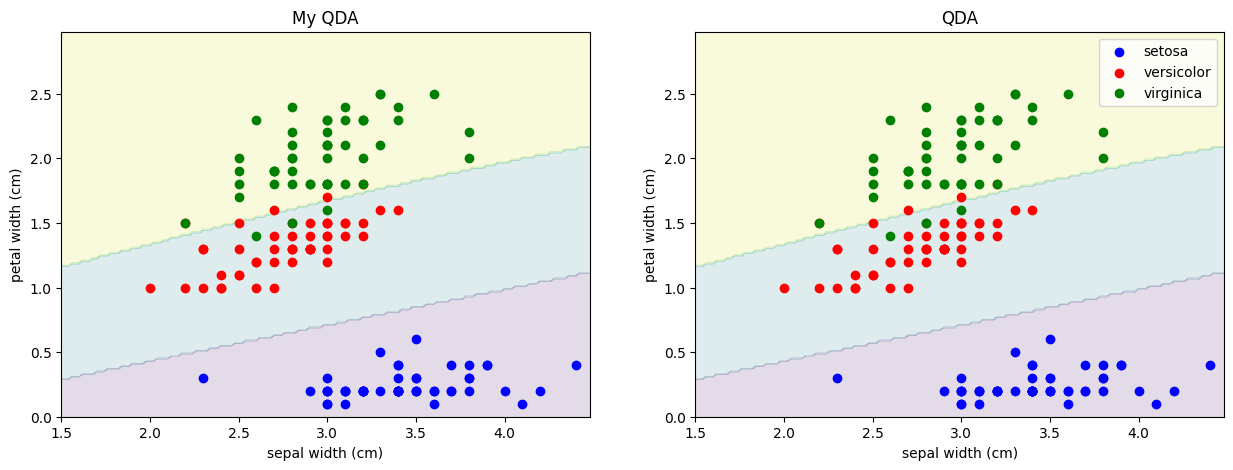

In [26]:
plt.figure(figsize=(15, 5))

# My QDA
plt.subplot(1, 2, 1)
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = my_qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label) 
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('My QDA')

# sk-learn QDA
plt.subplot(1, 2, 2)
xx, yy = np.meshgrid(np.arange(1.5, 4.5, 0.02),
                     np.arange(0, 3, 0.02))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.15)

dict_color = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}
for label in dict_color:
    plt.scatter(iris_df[iris_df['species'] == label][features[0]], 
                iris_df[iris_df['species'] == label][features[1]], 
                c=dict_color[label], label=label)
plt.title('QDA')
plt.xlabel(features[0])
plt.ylabel(features[1])

plt.legend()
plt.show()